Matplotlib is building the font cache; this may take a moment.


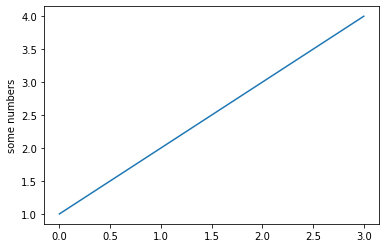

In [3]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

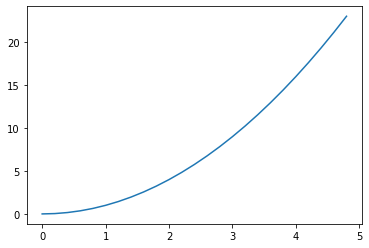

In [19]:
import numpy as np
t=np.arange(0.,5.,0.2)
plt.plot(t,t**2)
plt.show()

In [54]:
import pandas as pd
a = pd.DataFrame(np.random.rand(4, 5), columns = list('abcde'))
a_asarray = a.values

In [21]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

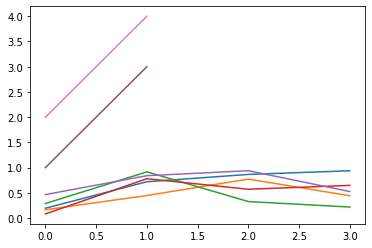

In [23]:
plt.plot(a)
plt.plot(b)

[ 1.  4.  7. 10.]


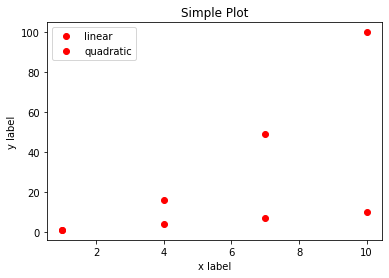

In [43]:
x = np.linspace(1,10,4)
print(x)
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, 'ro',label='linear',)  # Plot some data on the axes.
ax.plot(x, x**2,'ro', label='quadratic',)  # Plot more data on the axes...
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()

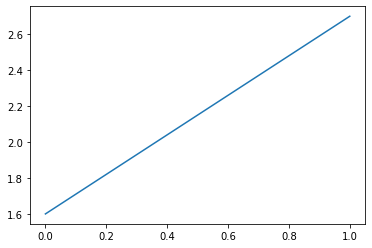

In [44]:
plt.ion()
plt.plot([1.6, 2.7])

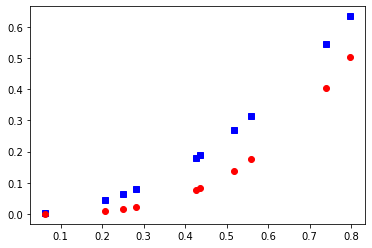

In [52]:
x=np.random.rand(10)
plt.plot(x,x**2,'bs',x,x**3,'ro')

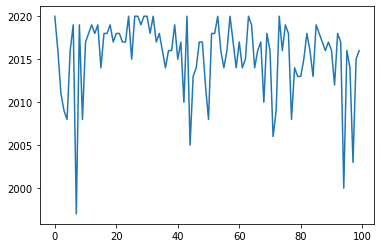

In [58]:
k=pd.read_csv('netflix_titles.csv')
a=k.release_year[0:100]
aval=a.values
plt.plot(aval)

In [59]:
k.describe(include="all").head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.0,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s7460,Movie,Jerry Seinfeld: 23 Hours To Kill,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3


In [61]:
data = k.fillna('NULL')
data['year_added'] = data['date_added'].apply(lambda x :  x.split(',')[-1])
data['year_added'] = data['year_added'].apply(lambda x : x if x != 'NULL' else '2020')
data['year_added'] = data['year_added'].apply(int)

In [62]:
movie = data[data['type'] == 'Movie']
tv_show = data[data['type'] == 'TV Show']

In [101]:
from collections import Counter
country_data = data['country']
country_counting = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
country_counting.drop(['NULL'], axis=0, inplace=True)

In [65]:
tot = sum(country_counting)
top20 = sum(country_counting[:20]) # 22 is real 20% but for simple processing

print(f'total : {tot}')
print(f'top 20 countries : {top20}')
print(f'percentage : {top20}/{tot} = {100 * top20/tot}')

total : 9067
top 20 countries : 7879
percentage : 7879/9067 = 86.8975405315981


In [66]:
top20_country = country_counting[:20]

In [111]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno

import warnings
plt.bar(top20_country.index,top20_country)
ax.set_xticks((top20_country.index))
ax.set_title('Top 20 producing countries', fontsize=15, fontweight='bold')

ModuleNotFoundError: No module named 'seaborn'

<ipython-input-110-3a47990893d0>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top20_country.index, rotation='90')


AttributeError: 'AxesSubplot' object has no attribute 'color_palette'

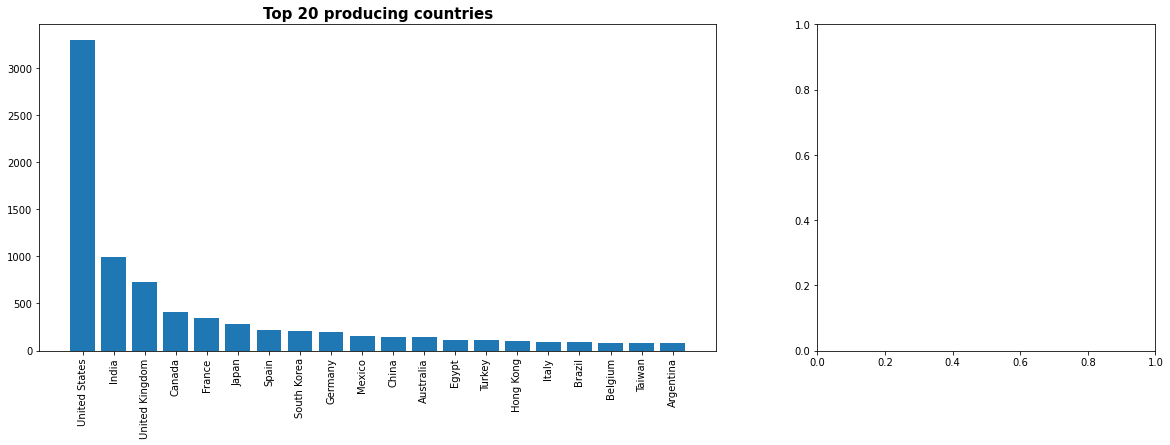

In [110]:

from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                       height_ratios=[6], 
                       width_ratios=[10, 5])

ax = plt.subplot(gs[0])
ax.bar(top20_country.index, top20_country,)
ax.set_xticklabels(top20_country.index, rotation='90')
ax.set_title('Top 20 producing countries', fontsize=15, fontweight='bold')

explode = [0 for _ in range(20)]
explode[0] = 0.06

ax2 = plt.subplot(gs[1])
ax2.pie(top20_country, labels=top20_country.index,
        shadow=True, startangle=0, explode=explode,
        colors=ax.color_palette("RdGy", n_colors=20)
       )
ax2.axis('equal') 

plt.show()

